# Clustering: K-Means

In [1]:
# Se importan las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Tamaño de las figuras y estilo ggplot
plt.rcParams["figure.figsize"]=(16,8)
plt.style.use("ggplot")

In [3]:
# Se lee el archivo analisis.csv
dataframe=pd.read_csv("../Data/analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


Categorías
1. Actor/Actriz
2. Cantante
3. Modelo
4. TV
5. Radio
6. Tecnología
7. Deportes
8. Política
9. Escritor

In [4]:
# Se cuentan las categorías
pd.value_counts(dataframe["categoria"])

2    34
1    27
4    19
7    17
8    16
3     9
6     8
9     6
5     4
Name: categoria, dtype: int64

In [5]:
# Otra forma de hacer lo anterior con .groupby
print(dataframe.groupby("categoria").size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


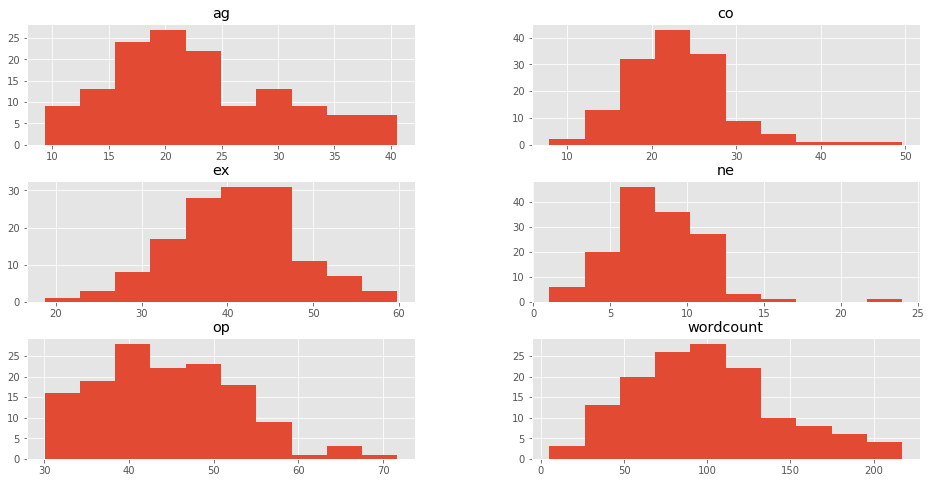

In [6]:
# Visualización de los datos con histogramas
dataframe.drop(["categoria"],1).hist() 
plt.show()

In [7]:
# El objetivo es aplicar K-Means para clasificar a los usuarios basándonos en "op", "ex" y "ag"
X=np.array(dataframe[["op","ex","ag"]]) # Arreglo que contiene las variables explicativas
y=np.array(dataframe["categoria"]) # Arreglo con las categorías originales

## Visualización de las categorías asignadas originalmente a cada usuario

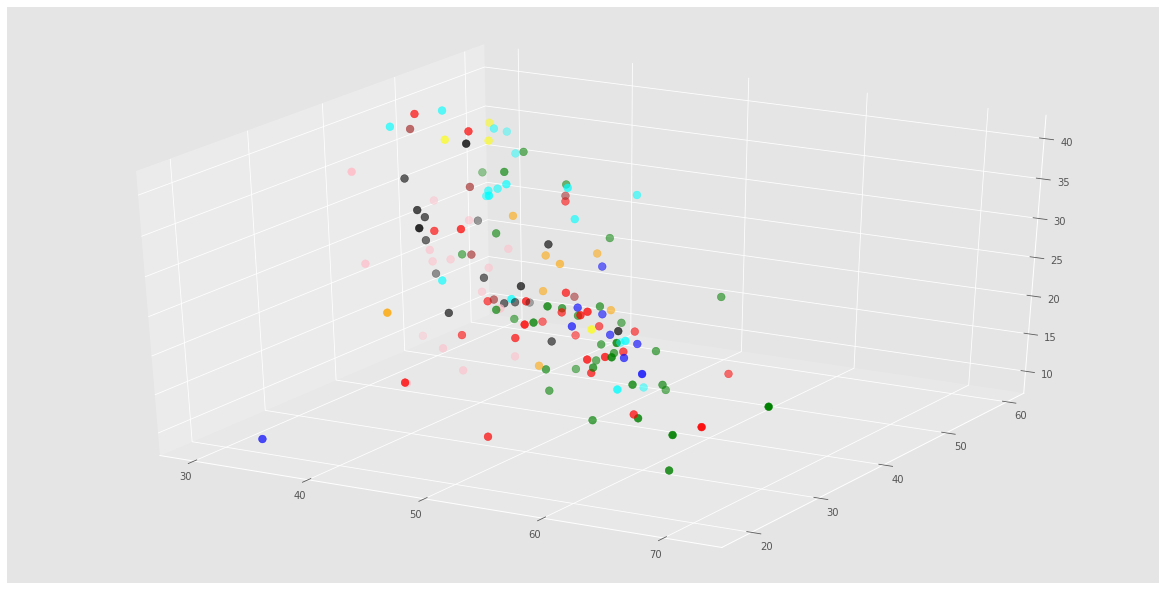

In [8]:
# Crear una figura en 3D
fig=plt.figure()
ax=Axes3D(fig)

# Asignación de colores por categoría
colores=["blue","red","green","blue","cyan","yellow","orange","black","pink","brown","purple"]
asignar=[]
# Si un usuario pertenece a la categoría 2 entonces se le asignará el color que se encuentra en dicha posición 
for row in y:
    asignar.append(colores[row])

# Gráfico de dispersión tridimensional
ax.scatter(X[:,0],X[:,1],X[:,2],c=asignar,s=60)

## Criterios de selección

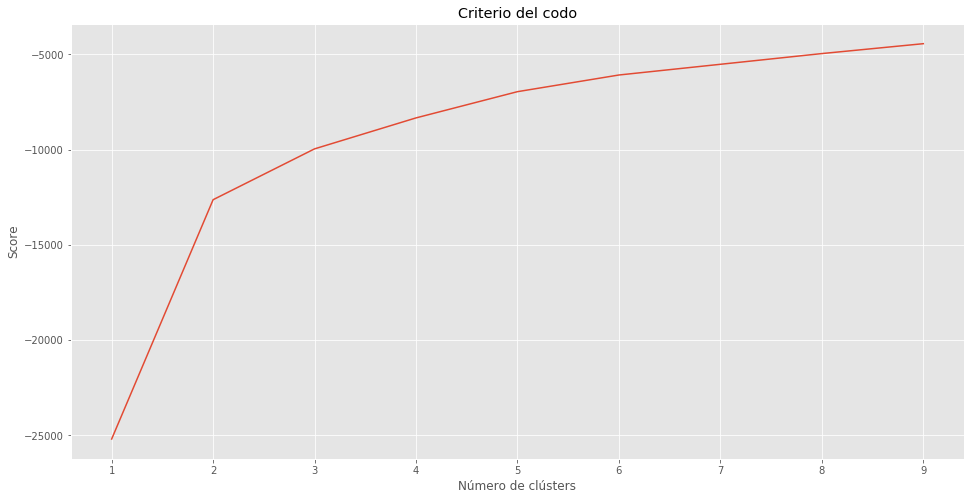

In [9]:
# Criterio del codo
Nk=range(1,10)
kmeans=[KMeans(n_clusters=i) for i in Nk]
score=[kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
fig2=plt.figure()

plt.plot(Nk,score)
plt.xlabel("Número de clústers")
plt.ylabel("Score")
plt.title("Criterio del codo")
plt.show()

El número óptimo de clústers es 2. Sin embargo, para efectos de la clase, se trabajará con 3 clústers.

## K-Means

In [10]:
# Modelo de K-Means
kmeans=KMeans(n_clusters=3).fit(X)
centroides=kmeans.cluster_centers_

# Cada centroide tiene 3 componentes, pues recordemos que contamos con 3 variables explicativas
print(centroides)

[[36.98208194 45.74596291 30.94431036]
 [57.44424027 33.20625036 15.56946505]
 [46.06490917 39.26071338 18.86180357]]


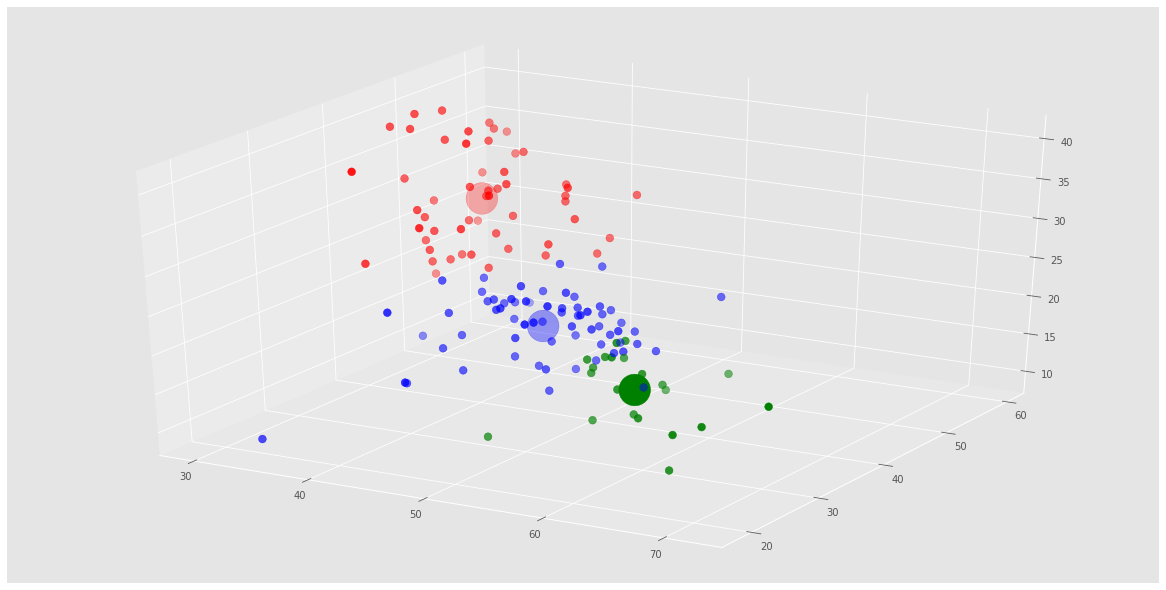

In [11]:
# Graficar los centroides
labels=kmeans.predict(X)   # Los clústers son el 0, 1 y 2

# Asignación de colores para los 3 clústers encontrados por K-Means
C=kmeans.cluster_centers_
colores=["red","green","blue","cyan","yellow"]
asignar=[]

# Si un usuario pertenece al clúster 2 entonces se le asignará el color de la lista que se encuentre en dicha posición
for row in labels:
    asignar.append(colores[row])

# Visualización
fig3=plt.figure()
ax=Axes3D(fig3)
ax.scatter(X[:,0],X[:,1],X[:,2],c=asignar,s=60)
ax.scatter(C[:,0],C[:,1],C[:,2],marker="o",c=["red","green","blue"],s=1000)

In [12]:
# Se crea un nuevo DataFrame con los usuarios junto con sus categorías originales y las predichas por K-Means
copy=pd.DataFrame()
copy["usuario"]=dataframe["usuario"].values
copy["categoria"]=dataframe["categoria"].values
copy["label"]=labels
copy

,usuario,categoria,label
0,3gerardpique,7,0
1,aguerosergiokun,7,2
2,albertochicote,4,0
3,AlejandroSanz,2,0
4,alfredocasero1,4,0
5,alo_oficial,7,0
6,andresiniesta8,7,0
7,andykusnetzoff,5,0
8,andyroddick,7,2
9,andy_murray,7,0


In [13]:
# Se crea un nuevo DataFrame para ver cuántos usuarios pertenecen a cada clúster propuesto con K-Means
numGrupo=pd.DataFrame()
numGrupo["color"]=colores
numGrupo["cantidad"]=copy.groupby("label").size()

In [14]:
# .size hace lo mismo que pd.value_counts
pd.value_counts(copy["label"])

2    65
0    53
1    22
Name: label, dtype: int64

In [15]:
numGrupo

,color,cantidad
0,red,53.0
1,green,22.0
2,blue,65.0
3,cyan,NaN
4,yellow,NaN


In [16]:
# Closest me devuelve los índices de los usuarios más cercanos a los centroides
closest,_=pairwise_distances_argmin_min(kmeans.cluster_centers_,X)
closest

array([98, 75, 89], dtype=int64)

In [17]:
# Se buscan a dichos usuarios
users=dataframe["usuario"].values
for u in closest:
    print(users[u])

maria_patino
JLo
KevinSpacey


In [18]:
# Nuevo usuario
x_newUser=np.array([[59.65,27.75,15.7]])

In [19]:
# Predecir el clúster al que pertenece el nuevo usuario con el modelo ajustado anteriormente
new_labels=kmeans.predict(x_newUser)
new_labels

array([1])